# Imports & globals

In [3]:
import sys
sys.path.append("/home/cbarkhof/fall-2021")

In [4]:
from analysis_run_postprocessing.general_postprocessing_steps import *

%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns; sns.set()
import pandas as pd

# c_cycler, cmap
from plot_utils import *

plt.rc('axes', prop_cycle=c_cycler)

DEVICE = "cuda:0"
EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
EVALUATION_RESULT_FILE = "evaluation-results.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"

# Fetch relevant runs

In [6]:
run_df = pd.read_csv("final_selection_runs.csv", index_col=0)
print(len(run_df), len(run_df[run_df.image_or_language == "image"]), len(run_df[run_df.image_or_language == "language"]))
run_df.head()

89 66 23


,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 10 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,10,basic_deconv_decoder,"(20-jan bmnist) INFO-VAE[l_1_rate=0.1, l_2_mmd..."
INFO-VAE l_Rate 0.1 l_MMD 10 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,10,cond_pixel_cnn_pp,"(20-jan bmnist) INFO-VAE[l_1_rate=0.1, l_2_mmd..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."


# Check whether there are evaluation results missing

In [7]:
missing_df = overview_of_missing_analysis(run_df)
missing_df.sum()

dir               0
surprisal_data    0
encode            0
samples           0
cond_samples      0
evaluation        0
dtype: int64

In [8]:
missing_df = run_df.join(missing_df, on="run_name")
missing_df.head()

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name,dir,surprisal_data,encode,samples,cond_samples,evaluation
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 10 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,10,basic_deconv_decoder,"(20-jan bmnist) INFO-VAE[l_1_rate=0.1, l_2_mmd...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 10 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,10,cond_pixel_cnn_pp,"(20-jan bmnist) INFO-VAE[l_1_rate=0.1, l_2_mmd...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False


# Gather all the evaluation results

In [9]:
all_results = dict()

for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    result_file = f"{save_dir}/{EVALUATION_RESULT_FILE}"
    
    if os.path.exists(result_file):
        res = torch.load(result_file)
        
        for phase, phase_res in res.items():
            
            all_results[(idx, phase)] = dict()
            
            for k in sorted(list(phase_res.keys())):
                if " mean" in k:
                    var_name = k.split(" mean")[0]
                    
                    all_results[(idx, phase)][var_name] = phase_res[k]

# Re-compute PPL, made a mistake first
for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    surprisal_d = torch.load(f"{EXPORT_DIR}/{row.run_name}/{SURPRISAL_DATA_FILE}")
    
    for phase in ["train", "valid", "test"]:
        if phase in surprisal_d:
            surprisal = surprisal_d[phase]

            iw_lls = np.array(surprisal["iw_lls"])
            lens = np.array(surprisal["lens"])

            perplexity = np.exp(- iw_lls.mean() / (lens.mean()+2))

            all_results[(idx, phase)]["PPL"] = perplexity
                    
results_df = pd.DataFrame(all_results).transpose()
results_df = results_df.reset_index(level=1).rename({"level_1":"phase"}, axis=1)
results_df.head()

I0210 16:40:23.994116 23092392595200 utils.py:145] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
I0210 16:40:23.995558 23092392595200 utils.py:157] NumExpr defaulting to 8 threads.
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice.
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,std_across_x_scale,std_across_z_mean,std_across_z_scale
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,test,-101.848379,0.112477,NaN,67.340919,-105.260177,37.919259,0.184871,0.036949,1.313261,0.008951,1.334510,0.008604
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,valid,-102.698863,0.109114,NaN,67.664685,-105.651187,37.986501,0.170109,0.036762,1.317382,0.008915,1.338601,0.008571
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,train,NaN,0.111386,NaN,62.173378,-100.287820,38.114442,0.169685,0.036772,1.328153,0.008922,1.346279,0.008638
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,test,-93.793252,0.068362,NaN,50.196447,-96.392718,46.196270,-0.141036,0.013599,1.167017,0.002962,1.185118,0.004405
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,valid,-92.494255,0.063386,NaN,50.566032,-96.655054,46.089022,-0.133279,0.013563,1.163724,0.002922,1.172160,0.004379


# Merge with the hyper parameters

In [10]:
results_df['hyper params'] = results_df.index.map(run_df.transpose().to_dict())
results_df = pd.concat([results_df, results_df['hyper params'].apply(pd.Series)], axis=1)
results_df.head()

,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,...,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,test,-101.848379,0.112477,NaN,67.340919,-105.260177,37.919259,0.184871,0.036949,1.313261,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,valid,-102.698863,0.109114,NaN,67.664685,-105.651187,37.986501,0.170109,0.036762,1.317382,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,train,NaN,0.111386,NaN,62.173378,-100.287820,38.114442,0.169685,0.036772,1.328153,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,test,-93.793252,0.068362,NaN,50.196447,-96.392718,46.196270,-0.141036,0.013599,1.167017,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,valid,-92.494255,0.063386,NaN,50.566032,-96.655054,46.089022,-0.133279,0.013563,1.163724,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."


In [11]:
results_df.to_csv("global_stats.csv")

# Columns present to plot

In [12]:
for i, c in enumerate(results_df.columns):
    print(i, c)

0 phase
1 IW LL
2 MMD
3 PPL
4 distortion
5 elbo
6 kl_prior_post
7 mean_mean
8 mean_scale
9 std_across_x_mean
10 std_across_x_scale
11 std_across_z_mean
12 std_across_z_scale
13 hyper params
14 objective
15 l_rate
16 dataset
17 image_or_language
18 beta_beta
19 free_bits
20 mdr_value
21 l_mmd
22 decoder
23 run_name


In [13]:
stats = ['IW LL', 'MMD', 'PPL', 'distortion', 'elbo', 'kl_prior_post', 'mean_mean', 'mean_scale']

pd.set_option('display.max_rows', 100)
summary_df = results_df[results_df.phase == "valid"].groupby("image_or_language")[stats].describe().transpose()
summary_df.reset_index().to_csv("summary_results.csv")
summary_df

image_or_language           image     language
IW LL         count  6.600000e+01    23.000000
              mean  -2.901275e+04  -102.368464
              std    2.349391e+05    34.383557
              min   -1.908748e+06  -253.314281
              25%   -9.674132e+01   -97.149140
              50%   -8.978585e+01   -90.948940
              75%   -8.161312e+01   -89.731588
              max   -7.886477e+01   -86.616172
MMD           count  6.600000e+01    23.000000
              mean   2.560297e-02     0.000406
              std    7.500159e-02     0.000879
              min   -1.574755e-04    -0.000010
              25%    2.277493e-04     0.000014
              50%    2.841175e-03     0.000085
              75%    1.581341e-02     0.000390
              max    5.309883e-01     0.004164
PPL           count  0.000000e+00    23.000000
              mean            NaN   377.398286
              std             NaN  1665.130407
              min             NaN    22.179813
              25%             NaN    23.234174
              50%             NaN    23.829907
              75%             NaN    30.451780
              max             NaN  8015.650256
distortion    count  6.600000e+01    23.000000
              mean   8.018214e+01    82.422311
              std    2.129681e+01     9.689784
              min    5.056603e+01    62.263308
              25%    6.957499e+01    74.158683
              50%    7.956670e+01    86.942798
              75%    8.196651e+01    90.205668
              max    1.541156e+02    90.595041
elbo          count  6.600000e+01    23.000000
              mean  -2.904714e+04  -104.723856
              std    2.351895e+05    36.203977
              min   -1.910786e+06  -262.025460
              25%   -1.017339e+02  -102.473082
              50%   -9.328748e+01   -91.410434
              75%   -8.191395e+01   -90.505009
              max   -8.054831e+01   -89.988720
kl_prior_post count  6.600000e+01    23.000000
              mean   2.896696e+04    22.301546
              std    2.351896e+05    43.561073
              min    4.323397e-05     0.000963
              25%    2.938191e-03     0.004559
              50%    1.581492e+01     4.467635
              75%    2.549189e+01    28.314399
              max    1.910707e+06   199.762152
mean_mean     count  6.600000e+01    23.000000
              mean  -7.017607e-01     0.000902
              std    5.746819e+00     0.012119
              min   -4.667969e+01    -0.024109
              25%   -4.283552e-03    -0.001996
              50%    1.077820e-04     0.000451
              75%    4.081574e-03     0.004769
              max    3.167336e-01     0.024210
mean_scale    count  6.600000e+01    23.000000
              mean   4.637042e-01     0.736641
              std    4.049153e-01     0.329051
              min    3.003057e-05     0.004218
              25%    9.496755e-02     0.496120
              50%    2.564184e-01     0.895992
              75%    9.935709e-01     0.992115
              max    1.025796e+00     0.996491

# Plots

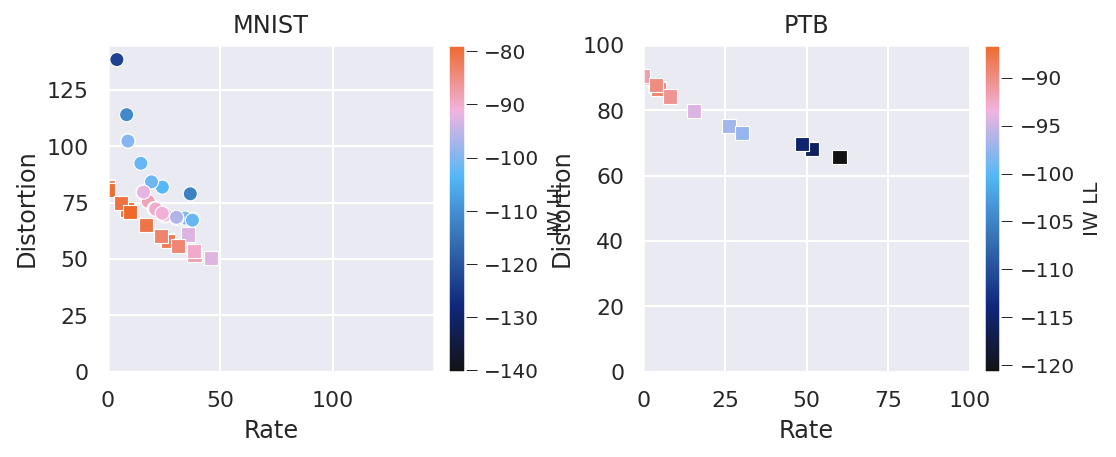

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = results_df[(results_df.phase == "valid") & (results_df.kl_prior_post < 150)]

markers = {
    'basic_deconv_decoder': "o",
    'cond_pixel_cnn_pp': "s",
    'strong_distil_roberta_decoder': "s"
}

fig, axs = plt.subplots(ncols=2, figsize=(8, 4)) # gridspec_kw={'width_ratios': [1, 0.1, 1, 0.1]}

for i, (group_name, group_df) in enumerate(data.groupby("image_or_language")):
    
    if group_name == "language":
        axs[i].set_title("PTB", size=12)
    else:
        axs[i].set_title("MNIST", size=12)
        
    sns.scatterplot(
        x="kl_prior_post", 
        y="distortion", 
        hue="IW LL", 
        markers=markers,
        palette=cmap, #"gnuplot2"
        style="decoder",
        s=50.,
        ax=axs[i],
        data=group_df)
    
    axs[i].legend()
    axs[i].set_xlabel("Rate")
    axs[i].set_ylabel("Distortion")
    
    if group_name == "language":
        upper_lim = 100
    else:
        upper_lim = 145
        
    axs[i].set_xlim([0, upper_lim])
    axs[i].set_ylim([0, upper_lim])
        
    axs[i].set_aspect("equal")

    norm = plt.Normalize(group_df['IW LL'].min(), group_df['IW LL'].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) #"gnuplot2"
    sm.set_array([])

    # Remove the legend and add a colorbar
    axs[i].get_legend().remove()
    
    #fig.colorbar(sm, cax=axs[i*2+1], orientation='vertical')
    #axs[i*].tick_params(labelsize=8)
    
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cax.tick_params(labelsize=10, width=0.5)
    
    fig.colorbar(sm, cax=cax, orientation='vertical')
    cax.set_ylabel("IW LL", size=10)
    
fig.subplots_adjust(wspace=0.5)

In [15]:
# data = results_df[(results_df.phase == "valid") & (results_df["IW LL"] > -200)]

# sns.scatterplot(
#     x="distortion", 
#     y="IW LL", 
#     hue="decoder", 
#     data=data) 

# plt.legend(loc=(1.05, 0.65))

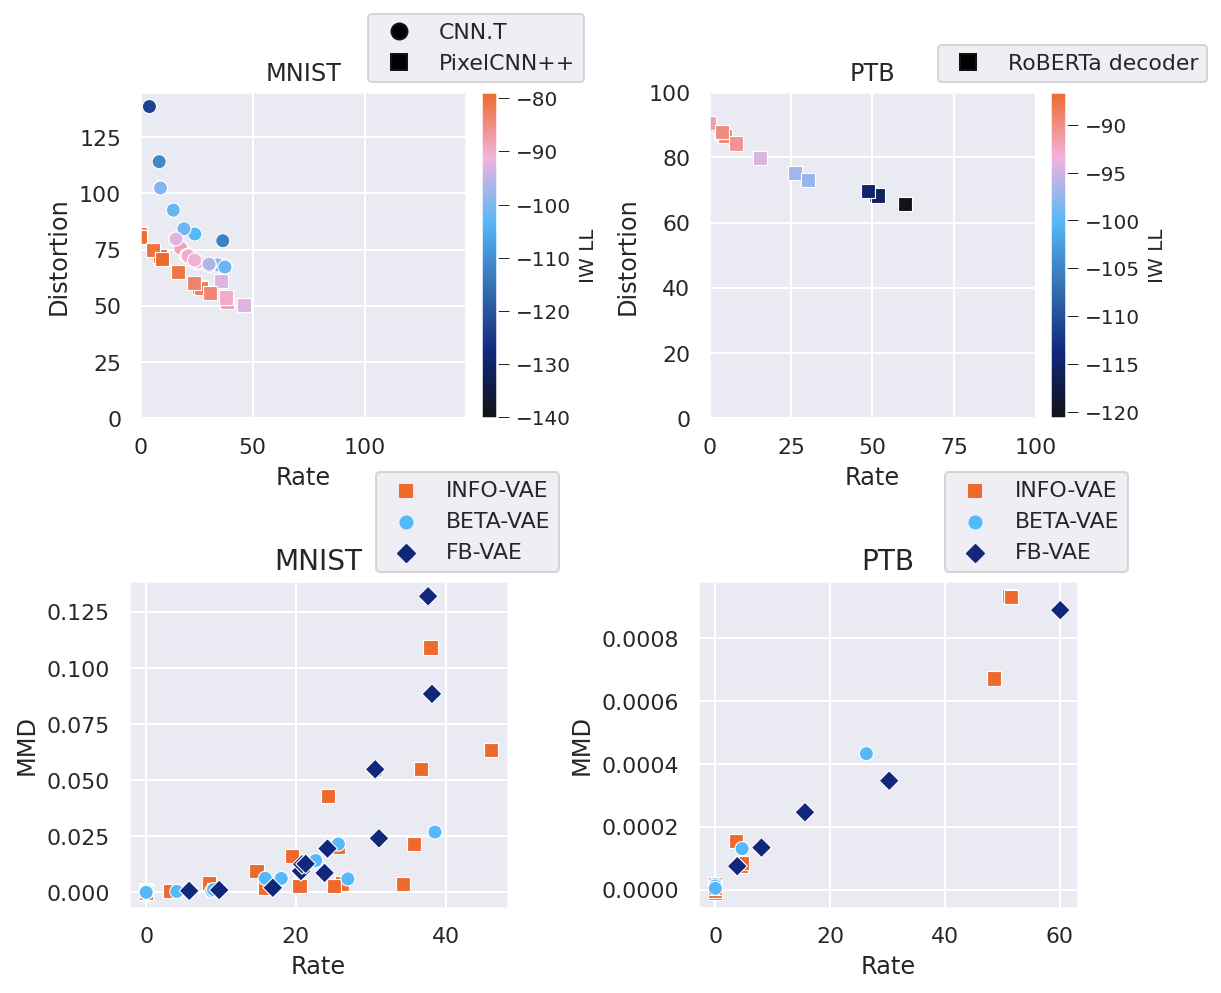

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
from matplotlib.lines import Line2D



data = results_df[(results_df.phase == "valid") & (results_df.kl_prior_post < 150)]

markers = {
    'basic_deconv_decoder': "o",
    'cond_pixel_cnn_pp': "s",
    'strong_distil_roberta_decoder': "s"
}

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8.5, 7.5)) # gridspec_kw={'width_ratios': [1, 0.1, 1, 0.1]}

for i, (group_name, group_df) in enumerate(data.groupby("image_or_language")):
    
    if group_name == "language":
        axs[0, i].set_title("PTB", size=12)
    else:
        axs[0, i].set_title("MNIST", size=12)
        
    sns.scatterplot(
        x="kl_prior_post", 
        y="distortion", 
        hue="IW LL", 
        markers=markers,
        palette=cmap, #"gnuplot2"
        style="decoder",
        s=50.,
        ax=axs[0, i],
        data=group_df)
    
    #axs[0, i].legend()
    axs[0, i].set_xlabel("Rate")
    axs[0, i].set_ylabel("Distortion")
    
    if group_name == "language":
        upper_lim = 100
    else:
        upper_lim = 145
        
    axs[0, i].set_xlim([0, upper_lim])
    axs[0, i].set_ylim([0, upper_lim])
        
    axs[0, i].set_aspect("equal")

    norm = plt.Normalize(group_df['IW LL'].min(), group_df['IW LL'].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) #"gnuplot2"
    sm.set_array([])

    # Remove the legend and add a colorbar
#     axs[0, i].get_legend().remove()
    
    #fig.colorbar(sm, cax=axs[i*2+1], orientation='vertical')
    #axs[i*].tick_params(labelsize=8)
    
    if group_name == "image":
        legend_elements = [Line2D([0], [0], marker='o', label='CNN.T',
                                            markerfacecolor='black', lw=0, markersize=8),
                           Line2D([0], [0], marker='s', label='PixelCNN++',
                                            markerfacecolor='black', lw=0, markersize=8)]
    else:
        legend_elements = [Line2D([0], [0], marker='s', label='RoBERTa decoder',
                                            markerfacecolor='black', lw=0, markersize=8)]
    axs[0, i].legend(handles=legend_elements, loc=(0.7, 1.03))
    
    divider = make_axes_locatable(axs[0, i])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cax.tick_params(labelsize=10, width=0.5)
    
    fig.colorbar(sm, cax=cax, orientation='vertical')
    cax.set_ylabel("IW LL", size=10)
    
# fig.subplots_adjust(wspace=0.5)

# NEW PLOTTING FUNCTION


palette_dict = {
    "INFO-VAE": c_dict["orange"],
    "BETA-VAE": c_dict["bright_blue"], #"#E458B3"
    "FB-VAE": c_dict["dark_blue"] #"#89E8BD"
}

marker_dict = {
    "INFO-VAE": "s",
    "BETA-VAE": "o",
    "FB-VAE": "D"
}

# fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

for i, group_name in enumerate(["image", "language"]):
    data_select = data[data.image_or_language == group_name]
    sns.scatterplot(
        x="kl_prior_post", 
        y="MMD", 
        hue="objective",
        s=50,
        style="objective",
        markers=marker_dict,
        palette=palette_dict,
        data=data_select,
        ax=axs[1, i])
    
    axs[1, i].set_ylabel("MMD", size=12)
    axs[1, i].set_xlabel("Rate", size=12)
    
    if group_name == "language":
        axs[1, i].set_title("PTB", size=14)
    else:
        axs[1, i].set_title("MNIST", size=14)
    
#     if i == 0:
#         axs[1, i].legend().remove()
#     else:
    axs[1, i].legend(loc=(0.65, 1.03))
    
# plt.tight_layout()

fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

plt.savefig("plots/intrinsic_evaluation.png", dpi=300, bbox_inches="tight")

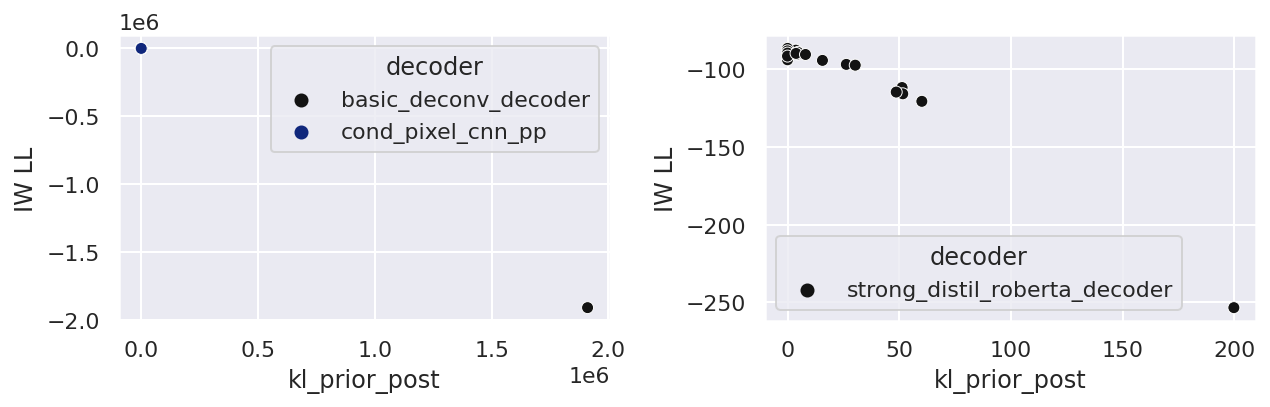

In [17]:
data = results_df[(results_df.phase == "valid")]

fig, axs = plt.subplots(ncols=2, figsize=(9, 3))
for i, group_name in enumerate(["image", "language"]):
    data_select = data[data.image_or_language == group_name]
    sns.scatterplot(
        x="kl_prior_post", 
        y="IW LL", 
        hue="decoder",
        data=data_select,
        ax=axs[i])
    
plt.tight_layout()